# KMeans Clustering

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Dog Horse KMeans Challenge

In [21]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]


In [22]:
# Scale Data
scaler = StandardScaler()

# Fit & transform data.
X_sc = scaler.fit_transform(X)

C:\Users\esooo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


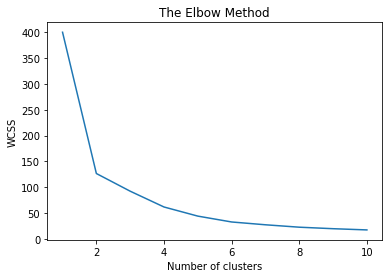

In [23]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X_sc)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#from the graph i think the optimal number of cluster is 5 

In [24]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X_sc)

In [25]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

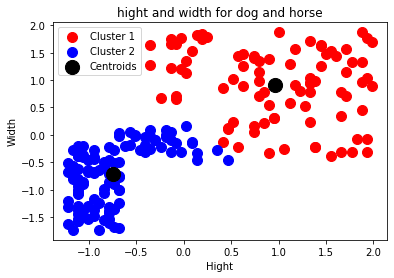

In [26]:
# plt.scatter(x-axis , y-axis, size, color, label )

plt.scatter(X_sc[y_kmeans == 0, 0], X_sc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_sc[y_kmeans == 1, 0], X_sc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X_sc[y_kmeans == 2, 0], X_sc[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('hight and width for dog and horse')
plt.xlabel('Hight')
plt.ylabel('Width')
plt.legend()
plt.show()

In [27]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


In [28]:
# Cluster centeriods
print (kmeans.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


In [29]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,0
196,82.0,179.0,1.0,horse,0
197,46.0,132.0,1.0,horse,0
198,56.0,89.0,1.0,horse,1


In [30]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['type'] = df_dh['type'].map({'dog': 1 , 'horse': 0})

In [31]:
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,1,1
1,27.0,92.0,0.0,1,1
2,32.0,47.0,0.0,1,1
3,30.0,90.0,0.0,1,1
4,28.0,91.0,0.0,1,1
...,...,...,...,...,...
195,55.0,140.0,1.0,0,0
196,82.0,179.0,1.0,0,0
197,46.0,132.0,1.0,0,0
198,56.0,89.0,1.0,0,1


In [32]:
# Calculate the number of correct predictions
df_dh['result'] = np.where(df_dh['type'] == df_dh['kmean_prid'], 'True','False')

In [33]:
#count = df_dh['result'].sum() # if it is 1 and 0
count = df_dh['result'].value_counts()['True']
count1 = df_dh['result'].value_counts()['False']

print('True : ', count)
print('False : ', count1)

True :  187
False :  13


In [34]:
df_dh

,height,weight,target,type,kmean_prid,result
0,27.0,71.0,0.0,1,1,True
1,27.0,92.0,0.0,1,1,True
2,32.0,47.0,0.0,1,1,True
3,30.0,90.0,0.0,1,1,True
4,28.0,91.0,0.0,1,1,True
...,...,...,...,...,...,...
195,55.0,140.0,1.0,0,0,True
196,82.0,179.0,1.0,0,0,True
197,46.0,132.0,1.0,0,0,True
198,56.0,89.0,1.0,0,1,False


In [48]:
# Compute Accuracy Score of KMean Labels with True Labels

#from sklearn.metrics.cluster import adjusted_rand_score
#adjusted_rand_score(df_dh['target'], df_dh['type'])

from sklearn.metrics import accuracy_score

print(accuracy_score(df_dh['type'],df_dh['kmean_prid']))

0.935


# Seattle Weather KMeans Challenge

In [49]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [50]:
# Scale Data
scaler = StandardScaler()

# Fit & transform data.
X_sc = scaler.fit_transform(X_sea)

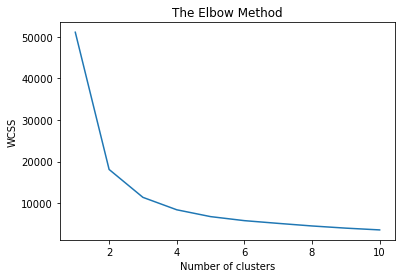

In [51]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X_sc)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 4, but our target is 2 so we should pick 2.

In [52]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 13)

y_kmeans = kmeans.fit_predict(X_sc)

In [53]:
print(y_kmeans)

[1 1 1 ... 1 1 1]


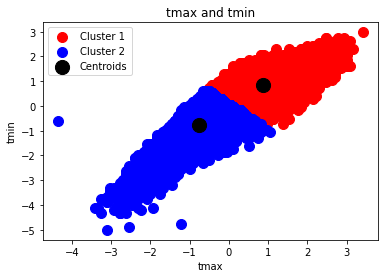

In [54]:
# plt.scatter(x-axis , y-axis, size, color, label )

plt.scatter(X_sc[y_kmeans == 0, 0], X_sc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_sc[y_kmeans == 1, 0], X_sc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

#plt.scatter(X_sc[y_kmeans == 2, 0], X_sc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

#plt.scatter(X_sc[y_kmeans == 3, 0], X_sc[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('tmax and tmin')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
plt.show()

In [55]:
# assign the y_kmeans to a new column
df_sea['kmean_prid']= y_kmeans
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,1
25547,2017-12-11,0.00,49,29,False,1
25548,2017-12-12,0.00,46,32,False,1
25549,2017-12-13,0.00,48,34,False,1


In [56]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea['rain'] = df_sea['rain'].map({True:1,False:0})

In [57]:
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,1.0,1
1,1948-01-02,0.59,45,36,1.0,1
2,1948-01-03,0.42,45,35,1.0,1
3,1948-01-04,0.31,45,34,1.0,1
4,1948-01-05,0.17,45,32,1.0,1
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0.0,1
25547,2017-12-11,0.00,49,29,0.0,1
25548,2017-12-12,0.00,46,32,0.0,1
25549,2017-12-13,0.00,48,34,0.0,1


In [58]:
# Calculate the number of correct predictions
df_sea['result'] = np.where(df_sea['rain'] == df_sea['kmean_prid'], 'True','False')

In [59]:
df_sea['result']

0         True
1         True
2         True
3         True
4         True
         ...  
25546    False
25547    False
25548    False
25549    False
25550    False
Name: result, Length: 25551, dtype: object

In [60]:
count = df_sea['result'].value_counts()['True']
count1 = df_sea['result'].value_counts()['False']
print('True ', count)
print('Flase ', count1)

True  16266
Flase  9285


In [61]:
df_sea.isnull().sum()

ds            0
prcp          3
tmax          0
tmin          0
rain          3
kmean_prid    0
result        0
dtype: int64

In [62]:
df_sea.dropna(subset=['rain'], inplace=True)

In [63]:
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid,result
0,1948-01-01,0.47,51,42,1.0,1,True
1,1948-01-02,0.59,45,36,1.0,1,True
2,1948-01-03,0.42,45,35,1.0,1,True
3,1948-01-04,0.31,45,34,1.0,1,True
4,1948-01-05,0.17,45,32,1.0,1,True
...,...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0.0,1,False
25547,2017-12-11,0.00,49,29,0.0,1,False
25548,2017-12-12,0.00,46,32,0.0,1,False
25549,2017-12-13,0.00,48,34,0.0,1,False


In [64]:
df_sea.isnull().sum()

ds            0
prcp          0
tmax          0
tmin          0
rain          0
kmean_prid    0
result        0
dtype: int64

In [65]:
# Compute Accuracy Score of KMean Labels with True Labels
from sklearn.metrics import accuracy_score

print(accuracy_score(df_sea['rain'],df_sea['kmean_prid']))

0.6366838891498356


# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [ ]:
# Scale Data

# Fit & transform data.


In [ ]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 



In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results


In [ ]:
# Plot the clusters 